<nav class="md-tags">
    <span class="md-tag">Markowitz Portfolio Optimization</span>
    <span class="md-tag">Efficient Frontier</span>
    <span class="md-tag">Python</span>
</nav> 

# Markowitz Portfolio Optimization

When it comes to investing, one of the most fundamental questions is: *How can I build a portfolio that gives me the best return with the least amount of risk?* The answer to this question lies in the work of Harry Markowitz, a financial economist whose theories revolutionized the way we approach portfolio management. Markowitz's **Portfolio Theory**, often referred to as the **Markowitz Efficient Frontier**, provides a framework for finding that balance using a mathematical approach to optimizing investments. 

## What Is Markowitz Portfolio Optimization?

At its core, **Markowitz Portfolio Optimization** is about finding the right mix of assets that will give you the highest expected return for a given level of risk (or the least risk for a given return). The theory suggests that investors should not look at individual investments in isolation, but rather, how they work together in a portfolio. 

Markowitz’s main contribution was the realization that combining different types of investments — stocks, bonds, real estate, etc. — can reduce the overall risk of a portfolio without necessarily lowering its expected return. This insight came from understanding that assets do not move in perfect harmony. Some investments rise when others fall, and this diversification can smooth out the bumps of the market, creating a more stable, efficient investment strategy.

## Key Concepts

### Risk and Return

Risk and return are two sides of the same coin. In simple terms:
- **Return** is the gain or profit you expect from your investments.
- **Risk** is the uncertainty or potential for loss in an investment. This is often measured by **volatility**, or how much an investment’s value fluctuates.

The fundamental goal of Markowitz’s theory is to find the optimal combination of assets that maximizes return for a given level of risk.

### Diversification

Diversification is the cornerstone of Markowitz’s theory. By holding a variety of investments, you reduce the impact of any single asset’s performance on the overall portfolio. The key is to choose assets that **don’t move in the same direction**. For example, when stock prices are falling, bond prices may be rising. By combining assets with **low or negative correlations**, you can lower the portfolio's risk.

### The Efficient Frontier

The **Efficient Frontier** is a curve that shows the optimal portfolios offering the highest expected return for a given level of risk. Portfolios below this curve are suboptimal, as they either offer lower returns for the same risk or higher risk for the same return.

-   *Graph Axes*:
    - The x-axis is Risk
    - The y-axis is Return

-   *The Curve*
    - The curve starts at the least risky portfolio and curves upward as you take on more risk for higher returns. 
    - Portfolios below the curve are bad deals—they have too much risk for the return they offer.
    - Portfolios on the curve are the best deals—they balance risk and return.

<img src="../../assets/images/efficient_frontier.png" alt="Efficient Frontier">

## Benefits and Limitations

### Benefits
- Encourages **diversification**, reducing portfolio risk.
- Provides a systematic, data-driven approach to portfolio construction.
- Helps visualize trade-offs between risk and return.

### Limitations
- Assumes historical data predicts future performance.
- Relies on estimates of returns and covariances, which can be inaccurate.
- Treats risk as variance, which penalizes upside volatility (positive surprises).

## The Markowitz Optimization Model

### Portfolio Return  
   The expected return of a portfolio is the weighted sum of the individual asset returns:  
   $$
   E(R_p) = \sum_{i=1}^n w_i E(R_i)
   $$  
   Here:
   - $ E(R_p) $: Portfolio’s expected return
   - $ w_i $: Weight (percentage) of the portfolio invested in asset $i$
   - $ E(R_i) $: Expected return of asset $i$

### Portfolio Risk (Variance)  
   Risk is captured by the variance (or standard deviation) of returns. For a portfolio:  
   $$
   \sigma_p^2 = \sum_{i=1}^n \sum_{j=1}^n w_i w_j \text{Cov}(R_i, R_j)
   $$  
   Where:
   - $ \sigma_p^2 $: Portfolio variance
   - $ \text{Cov}(R_i, R_j) $: Covariance between the returns of assets $i$ and $j$  
   Covariance measures how the returns of two assets move together. Diversification benefits arise when assets are negatively correlated or have low covariance.

### The Optimization Problem

The goal is to solve this constrained optimization problem:

$$
\text{Maximize } E(R_p) \text{ for a given level of } \sigma_p^2
$$

Or equivalently:

$$
\text{Minimize } \sigma_p^2 \text{ for a given level of } E(R_p)
$$

**Subject to:**
1. $\sum_{i=1}^n w_i = 1$ (The weights must sum to 1, i.e., you invest all your money.)
2. $w_i \geq 0$ (Non-negativity constraint if short-selling is not allowed.)


## Python model
### Import libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.optimize import minimize
import warnings
warnings.filterwarnings('ignore')

### Download data
We are going to use 10 different stocks in several sectors (Technology, Healthcare, Finance, and Retail)

In [2]:
stocks = [
    {"symbol": "AAPL", "name": "Apple Inc."},
    {"symbol": "MSFT", "name": "Microsoft Corporation"},
    {"symbol": "AMZN", "name": "Amazon.com Inc."},
    {"symbol": "TSLA", "name": "Tesla Inc."},
    {"symbol": "JNJ", "name": "Johnson & Johnson"},
    {"symbol": "PFE", "name": "Pfizer Inc."},
    {"symbol": "JPM", "name": "JPMorgan Chase & Co."},
    {"symbol": "V", "name": "Visa Inc."},
    {"symbol": "PG", "name": "Procter & Gamble Co."},
    {"symbol": "XOM", "name": "Exxon Mobil Corporation"}
]

In [3]:
symbols = [st['symbol'] for st in stocks]

In [4]:
# Download the Daily closing price for the last 10 years
stock_df = yfin.download(symbols, period="10y")['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [5]:
stock_df

Ticker,AAPL,AMZN,JNJ,JPM,MSFT,PFE,PG,TSLA,V,XOM
Date,,,,,,,,,,
2014-11-24,26.418226,16.782000,81.752777,46.244347,40.865200,19.331116,66.516785,16.448000,59.352398,61.911777
2014-11-25,26.188854,16.752001,81.615082,45.743679,40.762161,19.491039,67.037674,16.539333,59.967785,61.303799
2014-11-26,26.500629,16.678499,82.005203,45.774017,41.002590,19.894043,67.098068,16.562668,59.967785,61.109768
2014-11-28,26.485031,16.931999,82.800697,45.637470,41.054115,19.926027,68.268211,16.301332,60.184582,58.561356
2014-12-01,25.625439,16.299999,82.632408,45.516094,41.749657,19.996380,68.003967,15.442667,60.175240,59.732059
...,...,...,...,...,...,...,...,...,...,...
2024-11-18,228.020004,201.699997,154.770004,245.029999,414.929474,24.860001,170.750000,338.739990,312.160004,120.309998
2024-11-19,228.279999,204.610001,153.000000,243.089996,416.955414,25.100000,170.759995,346.000000,311.850006,118.629997
2024-11-20,229.000000,202.880005,153.110001,240.779999,414.659973,24.940001,170.889999,342.029999,307.390015,120.320000


In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-11-24 to 2024-11-22
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2517 non-null   float64
 1   AMZN    2517 non-null   float64
 2   JNJ     2517 non-null   float64
 3   JPM     2517 non-null   float64
 4   MSFT    2517 non-null   float64
 5   PFE     2517 non-null   float64
 6   PG      2517 non-null   float64
 7   TSLA    2517 non-null   float64
 8   V       2517 non-null   float64
 9   XOM     2517 non-null   float64
dtypes: float64(10)
memory usage: 216.3 KB


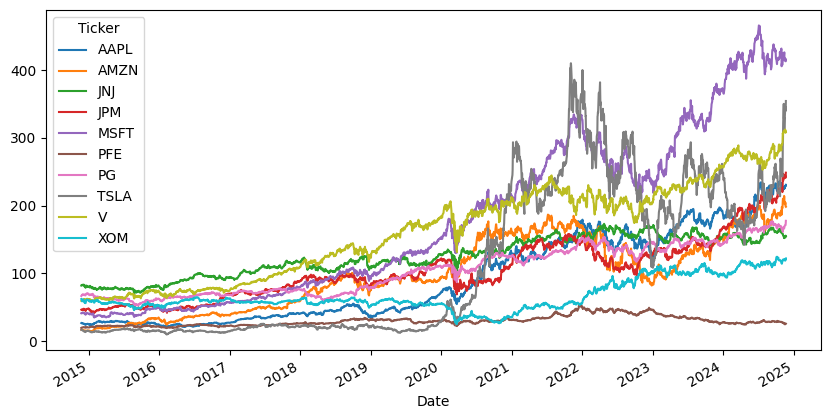

In [7]:
# plot stock closing price over time
stock_df.plot(figsize=(10,5));

### Daily Returns
Now, we are going to calculate the daily returns of these stocks

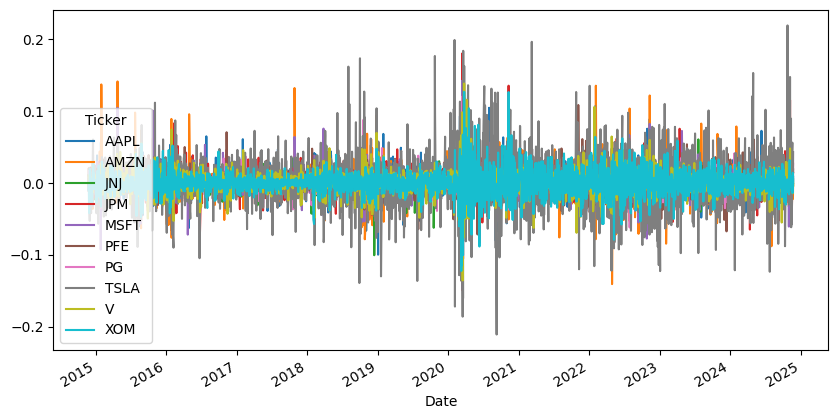

In [8]:
daily_returns = stock_df.pct_change(1).dropna()
daily_returns.plot(figsize=(10,5));

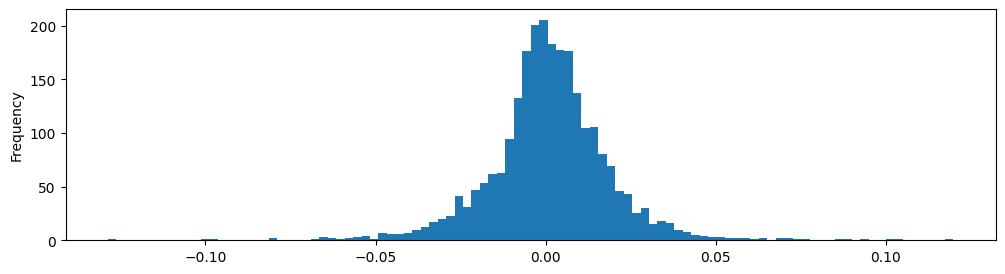

In [9]:
daily_returns['AAPL'].plot(kind='hist',bins=100,figsize=(12,3));

### Cumulative Returns

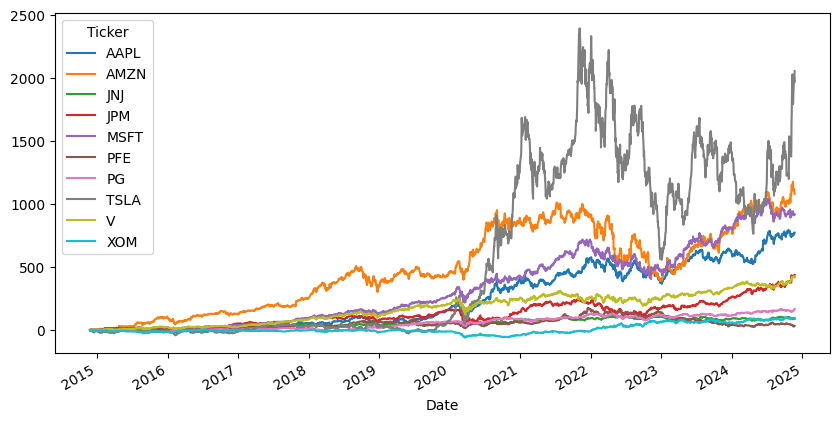

In [10]:
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns_perc = cumulative_returns*100
cumulative_returns_perc.plot(figsize=(10,5));

### Log Returns

In [11]:
# Log Returns as Percent of next day
log_returns = np.log(stock_df/stock_df.shift(1))
log_returns

Ticker,AAPL,AMZN,JNJ,JPM,MSFT,PFE,PG,TSLA,V,XOM
Date,,,,,,,,,,
2014-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-25,-0.008720,-0.001789,-0.001686,-0.010886,-0.002525,0.008239,0.007800,0.005537,0.010315,-0.009869
2014-11-26,0.011835,-0.004397,0.004769,0.000663,0.005881,0.020466,0.000900,0.001410,0.000000,-0.003170
2014-11-28,-0.000589,0.015085,0.009654,-0.002988,0.001256,0.001606,0.017289,-0.015904,0.003609,-0.042597
2014-12-01,-0.032994,-0.038040,-0.002035,-0.002663,0.016800,0.003524,-0.003878,-0.054113,-0.000155,0.019794
...,...,...,...,...,...,...,...,...,...,...
2024-11-18,0.013333,-0.004502,0.004988,-0.001142,0.001830,0.002416,0.007112,0.054664,0.008106,0.008347
2024-11-19,0.001140,0.014324,-0.011502,-0.007949,0.004871,0.009608,0.000059,0.021206,-0.000994,-0.014062
2024-11-20,0.003149,-0.008491,0.000719,-0.009548,-0.005520,-0.006395,0.000761,-0.011540,-0.014405,0.014145


In [12]:
# Notice how close this is to our original returns!
stock_df.pct_change(1)

Ticker,AAPL,AMZN,JNJ,JPM,MSFT,PFE,PG,TSLA,V,XOM
Date,,,,,,,,,,
2014-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-25,-0.008682,-0.001788,-0.001684,-0.010827,-0.002521,0.008273,0.007831,0.005553,0.010368,-0.009820
2014-11-26,0.011905,-0.004388,0.004780,0.000663,0.005898,0.020676,0.000901,0.001411,0.000000,-0.003165
2014-11-28,-0.000589,0.015199,0.009701,-0.002983,0.001257,0.001608,0.017439,-0.015779,0.003615,-0.041702
2014-12-01,-0.032456,-0.037326,-0.002032,-0.002660,0.016942,0.003531,-0.003871,-0.052675,-0.000155,0.019991
...,...,...,...,...,...,...,...,...,...,...
2024-11-18,0.013422,-0.004491,0.005000,-0.001141,0.001831,0.002419,0.007137,0.056186,0.008138,0.008382
2024-11-19,0.001140,0.014427,-0.011436,-0.007917,0.004883,0.009654,0.000059,0.021432,-0.000993,-0.013964
2024-11-20,0.003154,-0.008455,0.000719,-0.009503,-0.005505,-0.006374,0.000761,-0.011474,-0.014302,0.014246


### MonteCarlo simulation for Optimization Search
#### Generating Random Weights 

In [13]:
def gen_weights(n):
    source = np.random.random(n)
    # pos = np.random.randint(0,n)
    # source[pos] = 10
    weights = np.random.dirichlet(source,size=1)
    return np.array(weights[0])

#### Portfolio Returns Function

In [14]:
def calculate_returns(weights):
    return np.sum(log_returns.mean()*weights) * 252 #Annualized Returns

#### Portfolio Volatility (Variance) Function

In [15]:
log_returns_cov = log_returns.cov()  # Covariance
def calculate_volatility(weights):
    annualized_cov = np.dot(log_returns_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

#### Montecarlo
Now we just create many, many random weightings, and we can then plot them on expected return vs. expected volatility (coloring them by Sharpe Ratio):


In [16]:
n = len(stock_df.columns)
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(100000):
    # This may take a while!
    weights = gen_weights(n)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights))
    mc_portfolio_vol.append(calculate_volatility(weights))

In [17]:
# Sharpe Ratios
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

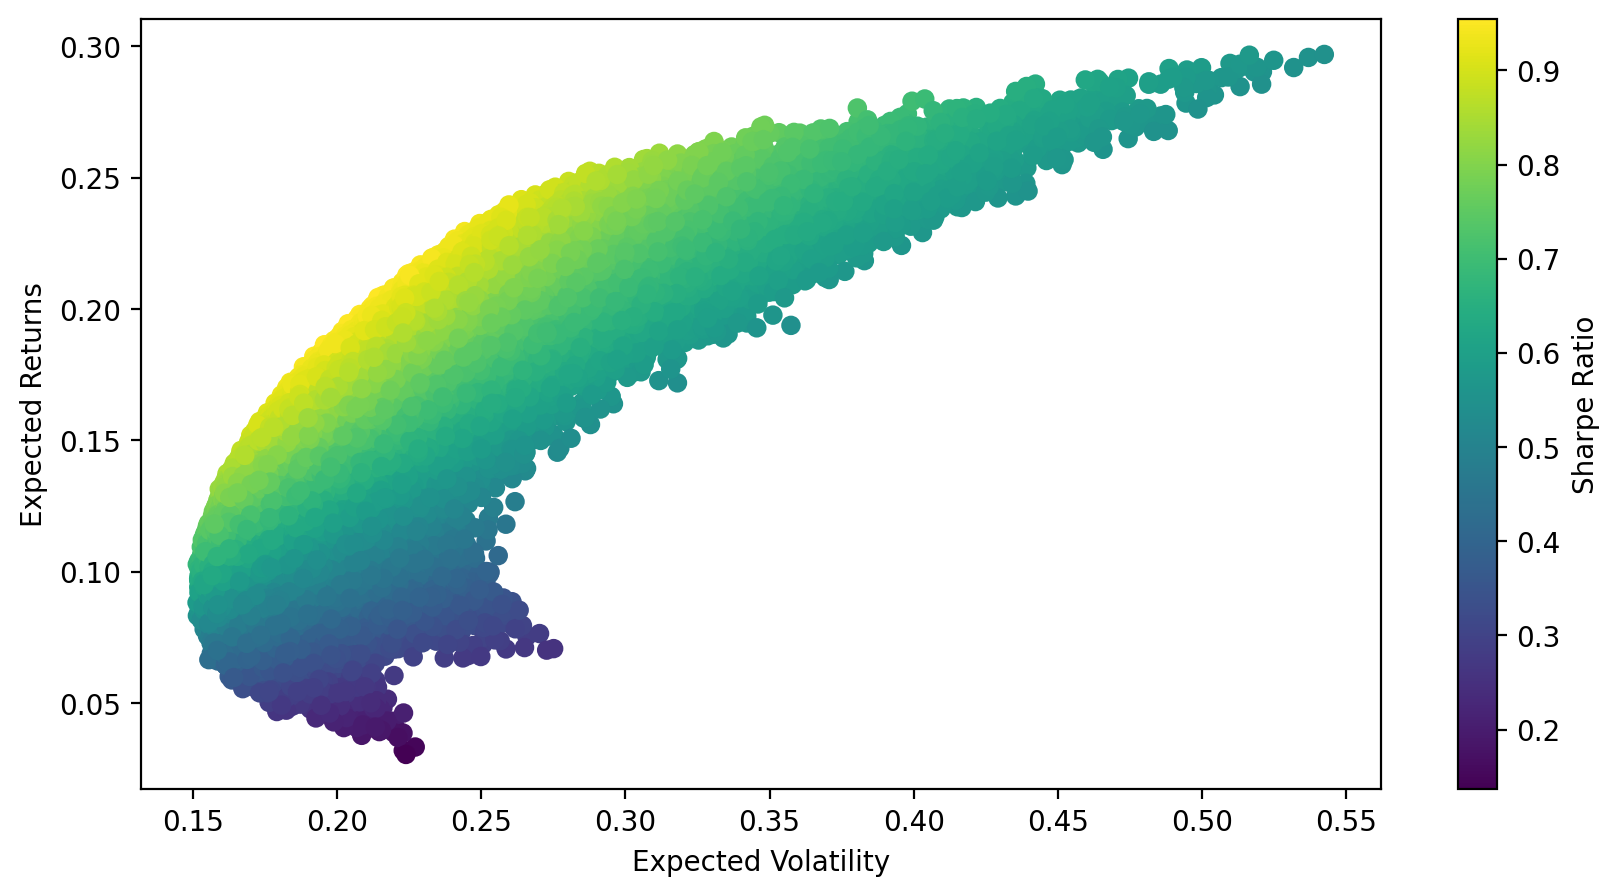

In [18]:
# Plot Results
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('Expected Returns')
plt.xlabel('Expected Volatility')
plt.colorbar(label='Sharpe Ratio');

In [19]:
# Portfolio from the MonteCarlo simulation that maximizes the Sharpe Ratio 
portfolio_mc_sr = mc_weights[np.argmax(mc_sharpe_ratios)]
portfolio_mc_sr

array([4.72203516e-02, 1.36616169e-01, 2.09472211e-02, 1.87584923e-01,
       3.99647867e-01, 4.05349264e-09, 1.38906542e-01, 6.74778789e-02,
       1.59904258e-03, 4.00561676e-12])

### Optimal Weighting through Minimization Search

In [20]:
# Objective Function
def objective(weight):
    # Note -1* because we are minimizing. It is the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weight)/calculate_volatility(weight))

In [21]:
# Bounds of the decision variables (weights)
bounds = tuple((0,1) for _ in range(n))

In [22]:
# Constraint - All weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weight: np.sum(weight)-1})

In [23]:
# Starting Guess
equal_weights = n * [1/n] 

In [24]:
results = minimize(fun=objective,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

In [25]:
portfolio_optimal_sr = results.x
portfolio_optimal_sr

array([1.13971593e-01, 1.94361952e-01, 0.00000000e+00, 1.71332999e-01,
       2.55048319e-01, 9.63313630e-17, 2.09921478e-01, 5.53636596e-02,
       2.03287907e-18, 6.27482007e-18])

### Results comparison

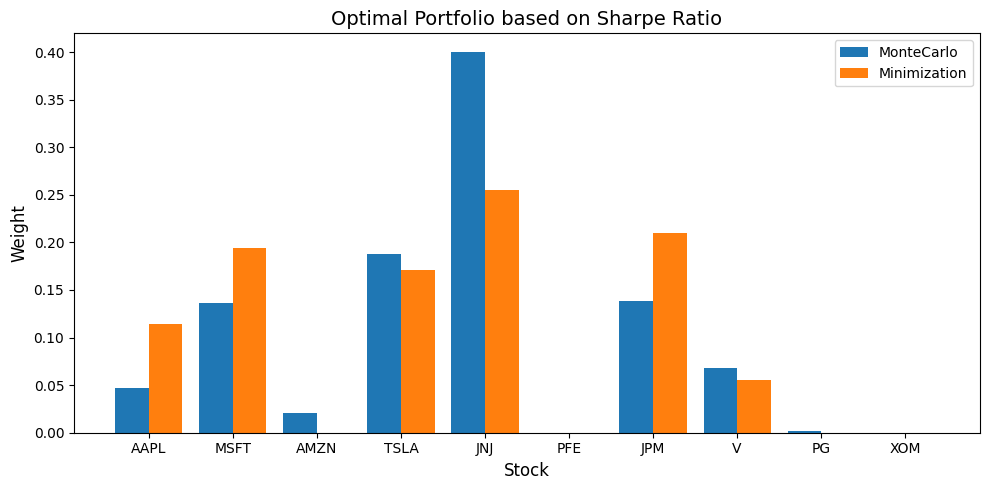

In [26]:
# Create x-axis positions for groups
x = np.arange(n)  # Positions for each stock
width = 0.4  # Width of each bar

# Create the bar plot
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, portfolio_mc_sr, width, label='MonteCarlo')  # Portfolio from MonteCarlo simulation
plt.bar(x + width/2, portfolio_optimal_sr, width, label='Minimization')   # Portfolio from minimization solution

# Add labels, title, and legend
plt.xlabel('Stock', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.title('Optimal Portfolio based on Sharpe Ratio', fontsize=14)
plt.xticks(x, symbols, fontsize=10)  # Set x-ticks to the names
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

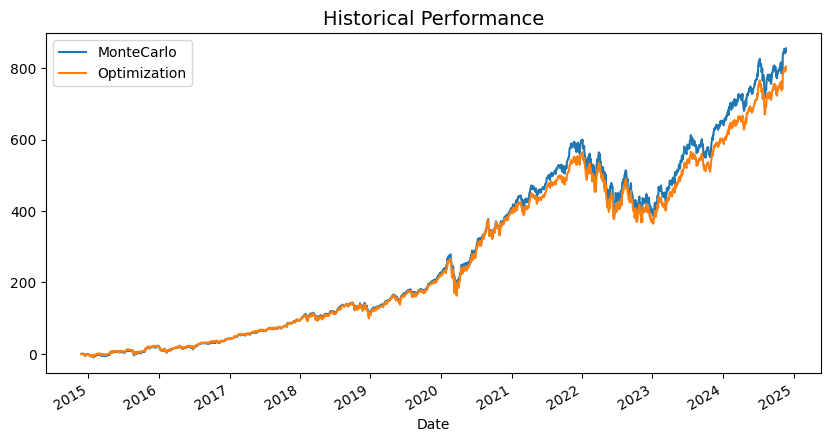

In [27]:
# Historical performance
mc_sr_returns = np.dot(portfolio_mc_sr,daily_returns.transpose())
optimal_sr_returns = np.dot(portfolio_optimal_sr,daily_returns.transpose())
# Cumulative returns
cumulative_mc_sr_returns = (1 + mc_sr_returns).cumprod() - 1
cumulative_mc_sr_returns_perc = pd.Series(cumulative_mc_sr_returns*100, index=daily_returns.index)
cumulative_optimal_sr_returns = (1 + optimal_sr_returns).cumprod() - 1
cumulative_optimal_sr_returns_perc = pd.Series(cumulative_optimal_sr_returns*100, index=daily_returns.index)

cumulative_mc_sr_returns_perc.plot(figsize=(10,5), label='MonteCarlo')
cumulative_optimal_sr_returns_perc.plot(figsize=(10,5), label='Optimization')
plt.title('Historical Performance', fontsize=14)
plt.legend(fontsize=10);

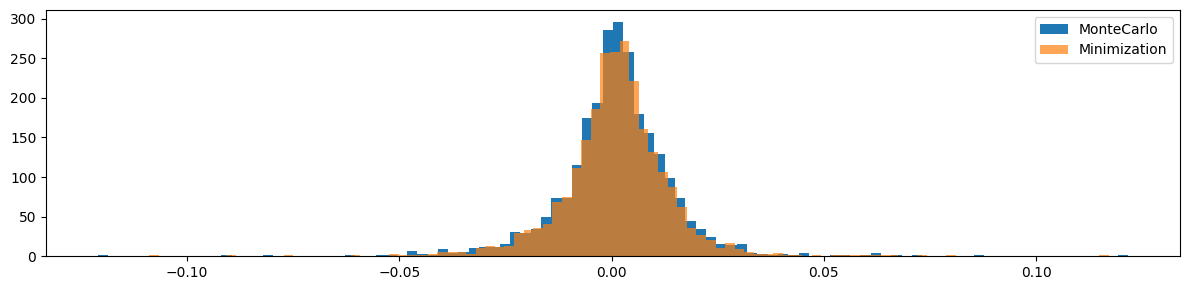

In [28]:
# Plot the histogram
plt.figure(figsize=(12, 3))
plt.hist(mc_sr_returns, bins=100, label='MonteCarlo')
plt.hist(optimal_sr_returns, bins=100, alpha=0.7, label='Minimization')
plt.legend(fontsize=10)
# Show the plot
plt.tight_layout()
plt.show()

In [29]:
stats = {
    'Montecarlo': {
        'Returns': calculate_returns(portfolio_mc_sr),
        'Volatility': calculate_volatility(portfolio_mc_sr),
        'Sharpe Ratio': calculate_returns(portfolio_mc_sr)/calculate_volatility(portfolio_mc_sr)
    },
    'Minimization': {
        'Returns': calculate_returns(portfolio_optimal_sr),
        'Volatility': calculate_volatility(portfolio_optimal_sr),
        'Sharpe Ratio': calculate_returns(portfolio_optimal_sr)/calculate_volatility(portfolio_optimal_sr)
    }
}
pd.DataFrame(stats)

,Montecarlo,Minimization
Returns,0.204399,0.198496
Volatility,0.214235,0.206010
Sharpe Ratio,0.954086,0.963527


### Efficient Frontier
The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return

In [30]:
# Expected Return Range
expected_returns_range = np.linspace(0.01,0.35,100)

In [31]:
# Constraints
constraints = ({'type':'eq','fun': lambda weight: np.sum(weight)-1},
               {'type':'eq','fun': lambda weight: calculate_returns(weight) - possible_return})

In [32]:
# Now loop for different expected returns:
frontier_volatility = []
weights_opt = pd.DataFrame(columns=range(n))
for possible_return in expected_returns_range:
    # function for return
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    frontier_volatility.append(result['fun'])
    weights_opt = pd.concat([weights_opt, pd.DataFrame(result['x']).T])

#### Plot Efficient Frontier

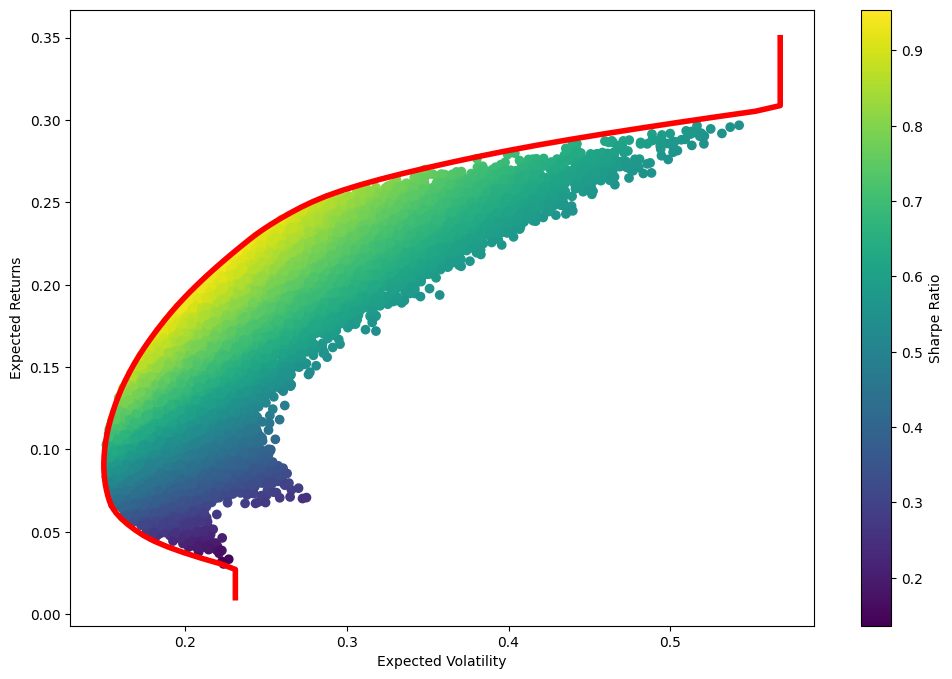

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('Expected Returns')
plt.xlabel('Expected Volatility')
plt.colorbar(label='Sharpe Ratio')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r-',linewidth=4);